# Лабораторная работа 4.3.1: Изучение дифракции света

In [437]:
from rich.console import Console
from rich.panel import Panel

import numpy as np
import matplotlib.pyplot as polt

from matplotlib.ticker import AutoMinorLocator, MultipleLocator
from sklearn import linear_model

console = Console()

In [ ]:
# Длина зеленой волны ртути
lambda_green = 546.1 * 10**(-9)

In [ ]:
# Расстояния между экраном и щелью
experiment_dists: dict[float, np.ndarray] = {
    0.17: np.array([3.1, 2.2, 1.6, 1.1, 1.0, 0.9]),
    0.27: np.array([10.9, 8.8, 5.7, 4.4, 3.7, 3.0])
}

# Ширины щели
D_1 = 0.17 * 10**(-3)
D_2 = 0.27 * 10**(-3)

points = np.arange(1, 6+1)

## Дифракция Френеля (на 1 щели)
### Зависимость расстояния между щелью и экраном от количества темных линий.

![рис. 1](./pictures/1.png)

#### Ширина щели $ D = 0.17 $ мм

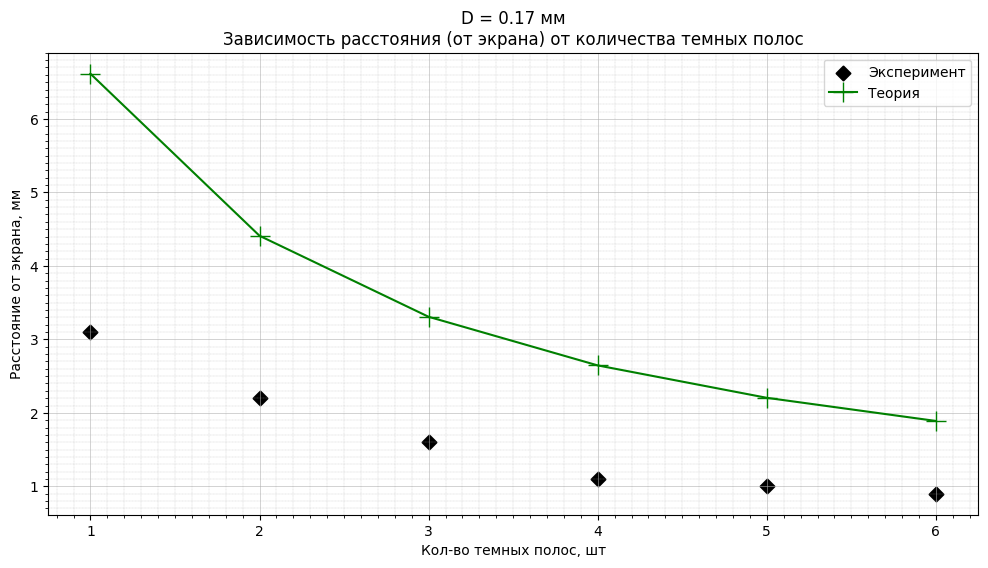

In [ ]:
_, ax = polt.subplots(1, 1, figsize=(12, 6))

ax.set_title("D = 0.17 мм\nЗависимость расстояния (от экрана) от количества темных полос")
ax.set_xlabel("Кол-во темных полос, шт")
ax.set_ylabel("Расстояние от экрана, мм")

ax.scatter(points,
           experiment_dists[0.17],
           s=50,
           linewidths=1.5,
           marker="D",
           color="black",
           label="Эксперимент")

# теория
ax.plot(points,
        (D_1/2)**2/((points+1)*lambda_green)/10**(-3),
        marker="+",
        markersize=15,
        color="green",
        label="Теория")

ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(AutoMinorLocator(10))
ax.yaxis.set_minor_locator(AutoMinorLocator(10))

polt.grid(which='minor', linestyle='--', linewidth=0.2)
polt.grid(which='major', linewidth=0.4)

polt.legend()
polt.show()

#### Ширина щели $ D = 0.27 $ мм

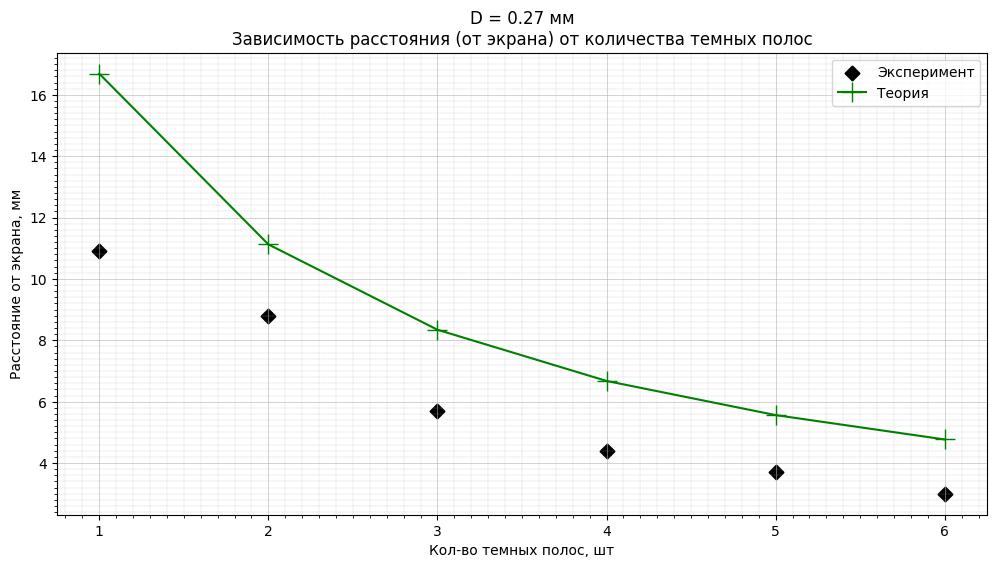

In [ ]:
_, ax = polt.subplots(1, 1, figsize=(12, 6))

ax.set_title("D = 0.27 мм\nЗависимость расстояния (от экрана) от количества темных полос")
ax.set_xlabel("Кол-во темных полос, шт")
ax.set_ylabel("Расстояние от экрана, мм")

ax.scatter(points,
           experiment_dists[0.27],
           s=50,
           linewidths=1.5,
           marker="D",
           color="black",
           label="Эксперимент")

# теория
ax.plot(points,
        (D_2/2)**2/((points+1)*lambda_green)/10**(-3),
        marker="+",
        markersize=15,
        color="green",
        label="Теория")

ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(AutoMinorLocator(10))
ax.yaxis.set_minor_locator(AutoMinorLocator(10))

polt.grid(which='minor', linestyle='--', linewidth=0.2)
polt.grid(which='major', linewidth=0.4)

polt.legend()
polt.show()

### Сравнение действительной ширины щели и посчитанной (по размеру зон Френеля)
#### $ D = 0.17 $ мм

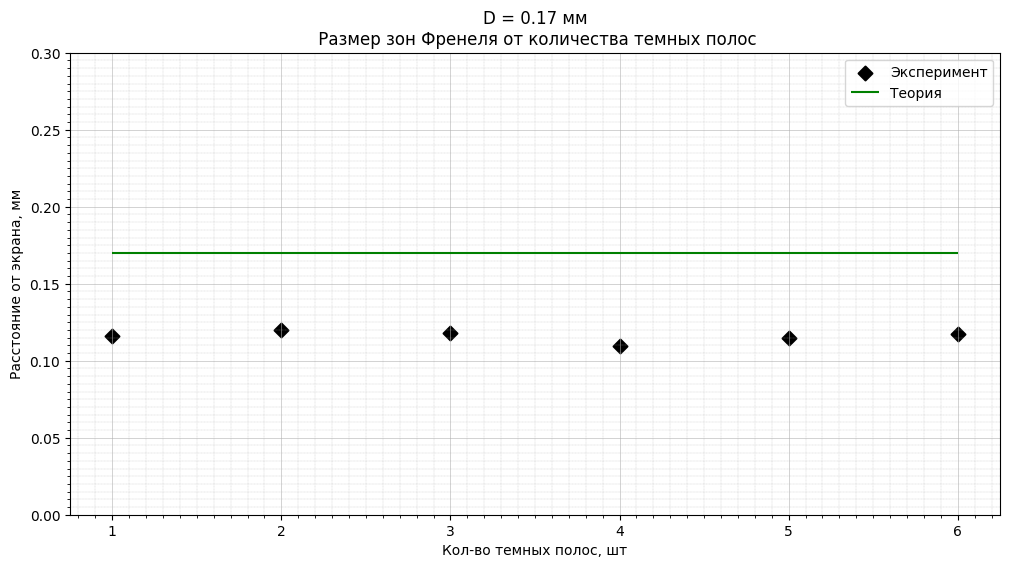

In [ ]:
_, ax = polt.subplots(1, 1, figsize=(12, 6))

ax.set_title("D = 0.17 мм\n Размер зон Френеля от количества темных полос")
ax.set_xlabel("Кол-во темных полос, шт")
ax.set_ylabel("Расстояние от экрана, мм")

ax.scatter(points,
           2*(experiment_dists[0.17]*10**(-3)*(points+1)*lambda_green)**0.5 * 10**3,
           s=50,
           linewidths=1.5,
           marker="D",
           color="black",
           label="Эксперимент")

ax.hlines(D_1 * 10**3,
          points[0],
          points[-1],
          color="green",
          label="Теория")

ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(AutoMinorLocator(10))
ax.yaxis.set_minor_locator(AutoMinorLocator(10))

polt.ylim(0, 0.3)

polt.grid(which='minor', linestyle='--', linewidth=0.2)
polt.grid(which='major', linewidth=0.4)

polt.legend()
polt.show()

#### Ширина щели $ D = 0.27 $ мм

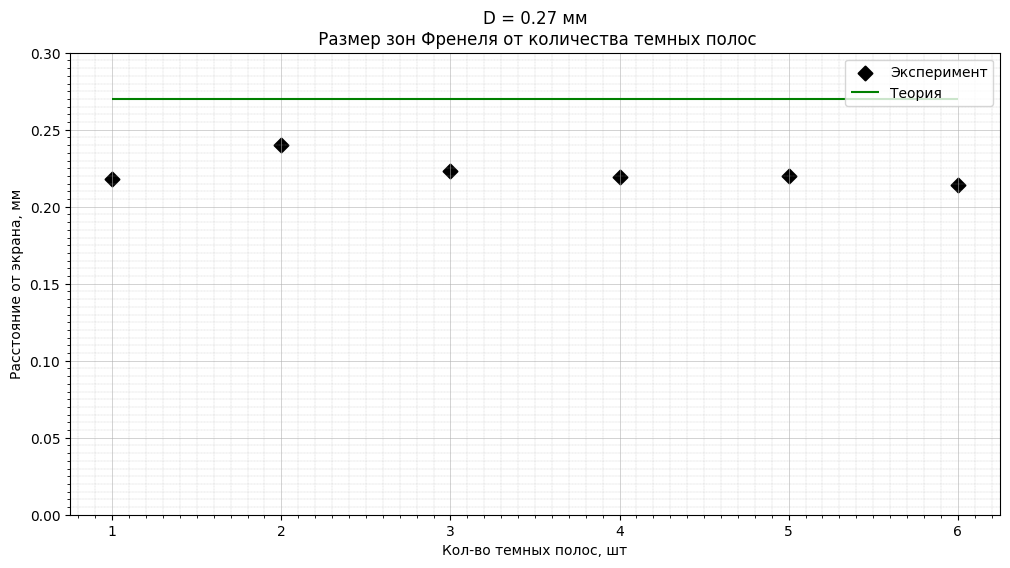

In [ ]:
_, ax = polt.subplots(1, 1, figsize=(12, 6))

ax.set_title("D = 0.27 мм\n Размер зон Френеля от количества темных полос")
ax.set_xlabel("Кол-во темных полос, шт")
ax.set_ylabel("Расстояние от экрана, мм")

ax.scatter(points,
           2*(experiment_dists[0.27]*10**(-3)*(points+1)*lambda_green)**0.5 * 10**3,
           s=50,
           linewidths=1.5,
           marker="D",
           color="black",
           label="Эксперимент")

ax.hlines(D_2 * 10**3,
           points[0],
           points[-1],
           color="green",
           label="Теория")

ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(AutoMinorLocator(10))
ax.yaxis.set_minor_locator(AutoMinorLocator(10))

polt.ylim(0, 0.3)

polt.grid(which='minor', linestyle='--', linewidth=0.2)
polt.grid(which='major', linewidth=0.4)

polt.legend()
polt.show()

## Дифракция Фраунгофера на одной щели

![рис. 4](./pictures/4.png)

In [ ]:
primary_experiment_dists: dict[float, np.ndarray] = {
    0.53: np.array([35.5, 35.8, 36.0, 36.1]) * 10**(-3),
    0.26: np.array([35.5, 36.1, 36.6, 37.0]) * 10**(-3)
}

D_1 = 0.53 * 10**(-3)
D_2 = 0.26 * 10**(-3)

# Фокусное расстояние второй линзы перед микроскопом
f_2 = 0.17

# "отражаем" и получаем отрицательные максимумы
experiment_dists: dict[float, np.ndarray] = {}
for key, item in primary_experiment_dists.items():
    diffs = np.diff(item)

    l = [item[0] - diffs[0],
         item[0] - diffs[0] - diffs[1],
         item[0] - diffs[0] - diffs[1] - diffs[2]]

    experiment_dists[key] = np.sort(np.concatenate((l, item[1:])))


points = np.arange(-3, 3+1)
points = points[points != 0]

#### $ D = 0.53 $ мм

╭─ Коэффициент МНК ─╮                                                                                              
│  Δx = 0.22143 мм  │                                                                                              
╰───────────────────╯

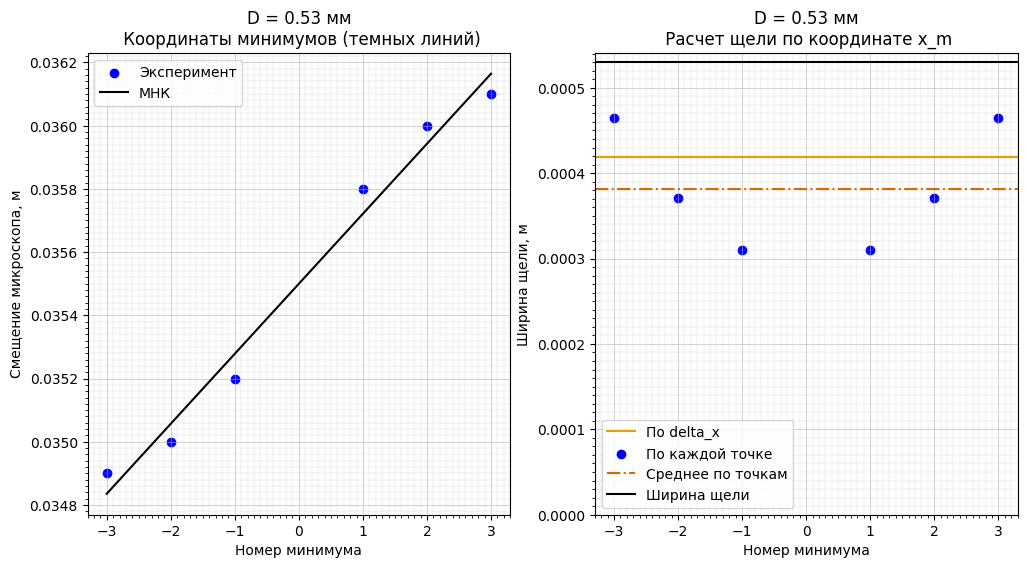

In [ ]:
OLS = linear_model.LinearRegression()
OLS.fit(X = points.reshape(-1, 1), y=experiment_dists[0.53])
 
delta_x = OLS.coef_[-1]

console.print(Panel(f"[bold] Δx =[/bold] {delta_x*10**3:.5f} мм", 
      border_style="white", 
      title="[bold white]Коэффициент МНК[/bold white]"), justify="left")

_, (ax_1, ax_2) = polt.subplots(1, 2, figsize=(12, 6))

ax_1.set_title("D = 0.53 мм\n Координаты минимумов (темных линий)")
ax_1.set_xlabel("Номер минимума")
ax_1.set_ylabel("Смещение микроскопа, м")

ax_1.scatter(points, 
             experiment_dists[0.53], 
             color="blue", 
             label="Эксперимент")

ax_1.plot(points,
          OLS.predict(points.reshape(-1, 1)), 
          color="black",
          label="МНК")


ax_2.axhline(f_2*lambda_green/delta_x, 
             label="По delta_x", 
             color='#EE9B01')

ax_2.scatter(points, 
             f_2*lambda_green*points/\
              (experiment_dists[0.53]-experiment_dists[0.53].mean()), 
              label="По каждой точке", 
              color="blue")

ax_2.axhline((f_2*lambda_green*points/\
              (experiment_dists[0.53]-experiment_dists[0.53].mean())).mean(), 
              linestyle='-.', 
              label="Среднее по точкам", 
              color='#DA6A00')

ax_2.axhline(D_1,    
             label="Ширина щели",
             color="black")

ax_2.set_xlabel("Номер минимума")
ax_2.set_ylabel("Ширина щели, м")

ax_2.set_ylim(0)
ax_2.set_title("D = 0.53 мм\n Расчет щели по координате x_m")

for ax in (ax_1, ax_2):
  ax.xaxis.set_major_locator(MultipleLocator(1))
  ax.xaxis.set_minor_locator(AutoMinorLocator(10))
  ax.yaxis.set_minor_locator(AutoMinorLocator(10))

  ax.grid(which='minor', linestyle='--', linewidth=0.2)
  ax.grid(which='major', linewidth=0.4)
  ax.legend()

polt.show()

#### $ D = 0.26 $ мм

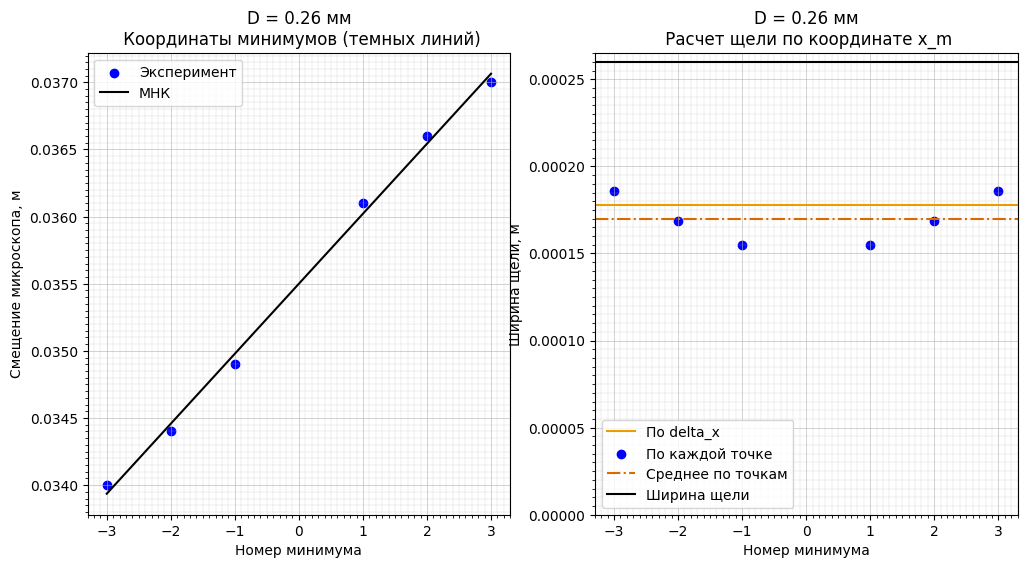

In [ ]:
OLS = linear_model.LinearRegression()
OLS.fit(X = points.reshape(-1, 1), y=experiment_dists[0.26])
 
delta_x = OLS.coef_[-1]

_, (ax_1, ax_2) = polt.subplots(1, 2, figsize=(12, 6))

ax_1.set_title("D = 0.26 мм\n Координаты минимумов (темных линий)")
ax_1.set_xlabel("Номер минимума")
ax_1.set_ylabel("Смещение микроскопа, м")

ax_1.scatter(points, 
             experiment_dists[0.26], 
             color="blue", 
             label="Эксперимент")

ax_1.plot(points, 
          OLS.predict(points.reshape(-1, 1)), 
          color="black",
          label="МНК")


ax_2.axhline(f_2*lambda_green/delta_x, 
             label="По delta_x", 
             color='#EE9B01')

ax_2.scatter(points, 
             f_2*lambda_green*points/\
              (experiment_dists[0.26]-experiment_dists[0.26].mean()), 
              label="По каждой точке", 
              color="blue")

ax_2.axhline((f_2*lambda_green*points/\
              (experiment_dists[0.26]-experiment_dists[0.26].mean())).mean(), 
              linestyle='-.', 
              label="Среднее по точкам", 
              color='#DA6A00')

ax_2.axhline(D_2,
             label="Ширина щели", 
             color="black")

ax_2.set_xlabel("Номер минимума")
ax_2.set_ylabel("Ширина щели, м")

ax_2.set_ylim(0)
ax_2.set_title("D = 0.26 мм\n Расчет щели по координате x_m")

for ax in (ax_1, ax_2):
  ax.xaxis.set_major_locator(MultipleLocator(1))
  ax.xaxis.set_minor_locator(AutoMinorLocator(10))
  ax.yaxis.set_minor_locator(AutoMinorLocator(10))

  ax.grid(which='minor', linestyle='--', linewidth=0.2)
  ax.grid(which='major', linewidth=0.4)
  ax.legend()

polt.show()

## Дифракция Фраунгофера на двух щелях

![рис. 6](./pictures/6.png)

In [447]:
d = 1.5 * 10**(-3)
D = 0.5 * 10**(-3)

In [ ]:
amount = 8

left, right = 35.2, 35.9

delta_x_exp = (right - left)/amount

d_exp = f_2*lambda_green/delta_x_exp*10**3

panels = [
Panel(f"[bold] 'красивая' Δx =[/bold] {delta_x_exp:.5f} мм", 
      border_style="white", 
      title="[bold white]Экспериментальные данные[/bold white]"),

Panel(f"[bold]d_эксп =[/bold] {d_exp*10**3:.5f} мм | [bold]d_факт =[/bold] {d*10**3:.5f} мм", 
      border_style="white", 
      title="[bold white]Диаметр[/bold white]"),
  
Panel(f"[bold]n_факт =[/bold] {amount} | [bold]n_теор =[/bold] {2*d/D:.1f}", 
      border_style="white", 
      title="[bold white]Количество полос[/bold white]")
]

console.print(*panels, justify="left")

╭─ Экспериментальные данные ──╮                                                                                    
│  'красивая' Δx = 0.08750 мм │                                                                                    
╰─────────────────────────────╯                                                                                    
╭───────────────── Диаметр ─────────────────╮                                                                      
│ d_эксп = 1.06099 мм | d_факт = 1.50000 мм │                                                                      
╰───────────────────────────────────────────╯                                                                      
╭──── Количество полос ─────╮                                                                                      
│ n_факт = 8 | n_теор = 6.0 │                                                                                      
╰───────────────────────────╯

## Ответы на контрольные вопросы
![1-3](./control_questions/1-3.png)

![4-5](./control_questions/4-5.png)

![6-7](./control_questions/6-7.png)